## Data Challenge 3: Conversion Rate

**This notebook is intended to **<br>
NOTE: I added an "index" column in Excel, because the country didn't seem an appropriate index into the dataframe. <br><br>

In [8]:
# Import some packages we'll use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
import graphviz 
from sklearn.preprocessing import OneHotEncoder


In [3]:
# it's not a huge amount of data; I can simply import it all as two dataframes

conv_table = pd.DataFrame.from_csv('/Users/z_home/zLearnPy/LeetCode_forGithub/Insight_DataChallenges/Data_Challenge3/conversion_data.csv')

In [18]:
# test cell
print(conv_table.iloc[0:15,:]) # just to confirm that it looks as expected


      country  age  new_user  source  total_pages_visited  converted
index                                                               
1          UK   25         1     Ads                    1          0
2          US   23         1     Seo                    5          0
3          US   28         1     Seo                    4          0
4       China   39         1     Seo                    5          0
5          US   30         1     Seo                    6          0
6          US   31         0     Seo                    1          0
7       China   27         1     Seo                    4          0
8          US   23         0     Ads                    4          0
9          UK   29         0  Direct                    4          0
10         US   25         0     Ads                    2          0
11         US   38         0     Seo                    1          0
12         US   43         1  Direct                    8          0
13      China   31         0     S

In [15]:
# Confirm nothing unexpected in our source data; should just be ads, seo, direct
print(conv_table.source.unique())

['Ads' 'Seo' 'Direct']


In [16]:
# Let's check for any Null values also, as those can trip up models
conv_table.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [17]:
# How many countries are represented here?
print(conv_table.country.unique())

['UK' 'US' 'China' 'Germany']


country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64


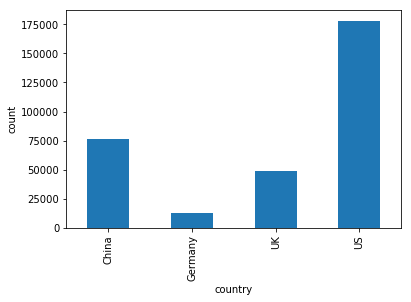

In [62]:
# And how many from each country?
countries = conv_table.groupby('country').size()

print (countries)
countries.plot.bar().set_ylabel("count")

plt.show()

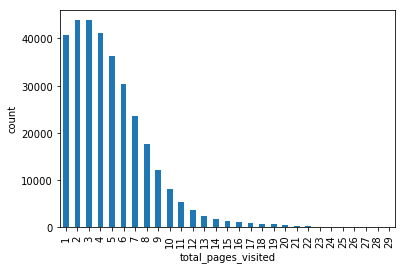

In [55]:
# How many total page visits?
page_visits = conv_table.groupby('total_pages_visited').size()

#print (page_visits)
page_visits.plot.bar().set_ylabel("count")

plt.show()

age
17      7597
18      8466
19      9349
20     10156
21     10966
22     11701
23     12336
24     12960
25     13460
26     13931
27     14084
28     14341
29     14158
30     14346
31     13692
32     13507
33     12631
34     12108
35     11471
36     10779
37      9761
38      8970
39      8202
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
72         1
73         1
77         1
79         1
111        1
123        1
Name: converted, dtype: int64


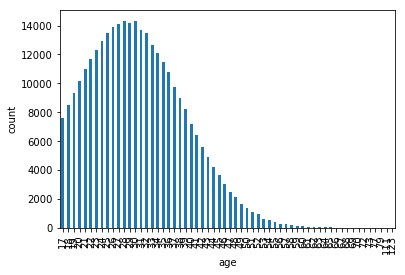

In [29]:
# How many different ages?
ages = conv_table.groupby('age').size()

print (ages)
ages.plot.bar().set_ylabel("count")

plt.show()

In [4]:
# seems like we have a couple of unlikely ages - let's kill off anything over 100
conv_noOutliers = conv_table[conv_table.age < 100]

converted  country
0          China       76500
           Germany     12240
           UK          45900
           US         171360
1          China         102
           Germany       816
           UK           2550
           US           6732
dtype: int64


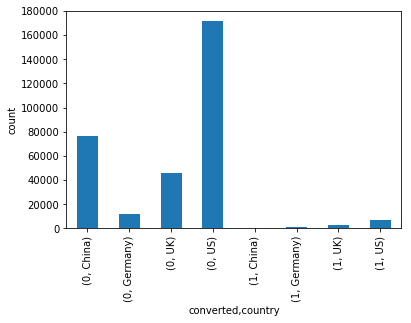

In [37]:
# Now let's see who converted, by country
conversions = conv_noOutliers.groupby(['converted','country']).size()

print (conversions)
conversions.plot.bar().set_ylabel("count")

plt.show()

         converted
country           
China          102
Germany        816
UK            2550
US            6732
country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64
         converted
country           
China     0.001332
Germany   0.062500
UK        0.052632
US        0.037801


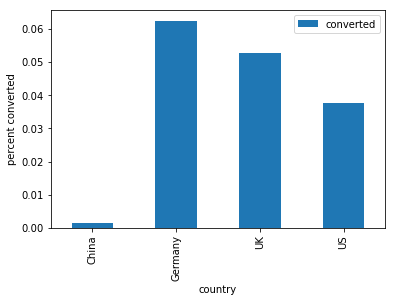

In [46]:
# Now let's see who converted, by country
conversions_country = conv_noOutliers.groupby(['country']).agg({'converted':'sum'})
all_country = conv_noOutliers.groupby(['country']).size()

country_pcts = conversions_country.divide(all_country, axis='rows')

print(conversions)
print(all_country)
print(country_pcts)

country_pcts.plot.bar().set_ylabel("percent converted")
plt.show()

        converted
source           
Ads      0.034483
Direct   0.028169
Seo      0.032895


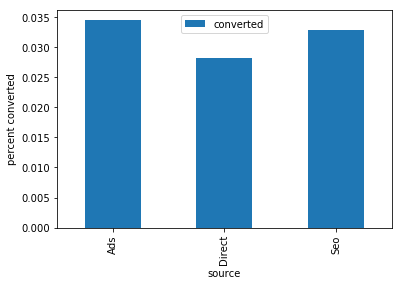

In [47]:
# Now let's see who converted, by source
conversions_source = conv_noOutliers.groupby(['source']).agg({'converted':'sum'})
all_source = conv_noOutliers.groupby(['source']).size()

source_pcts = conversions_source.divide(all_source, axis='rows')

print(source_pcts)

source_pcts.plot.bar().set_ylabel("percent converted")
plt.show()

          converted
new_user           
0          0.072002
1          0.014021


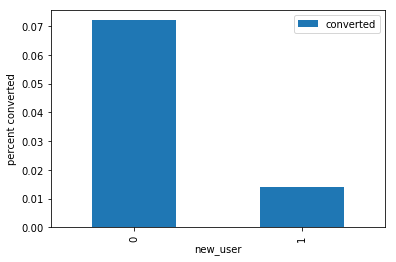

In [49]:
# New users or repeat users?
conversions_new_user = conv_noOutliers.groupby(['new_user']).agg({'converted':'sum'})
all_new_user = conv_noOutliers.groupby(['new_user']).size()

new_user_pcts = conversions_new_user.divide(all_new_user, axis='rows')

print(new_user_pcts)

new_user_pcts.plot.bar().set_ylabel("percent converted")
plt.show()

                     converted
total_pages_visited           
1                     0.000000
2                     0.000228
3                     0.000251
4                     0.000780
5                     0.001570
6                     0.003437
7                     0.006769
8                     0.015238
9                     0.033067
10                    0.061184
11                    0.123471
12                    0.244537
13                    0.400825
14                    0.587521
15                    0.740377
16                    0.871818
17                    0.923077
18                    0.961219
19                    0.989381
20                    0.997531
21                    1.000000
22                    1.000000
23                    1.000000
24                    1.000000
25                    1.000000
26                    1.000000
27                    1.000000
28                    1.000000
29                    1.000000


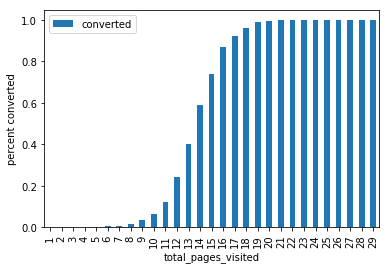

In [50]:
# Pages visited - more is better?
conversions_pages = conv_noOutliers.groupby(['total_pages_visited']).agg({'converted':'sum'})
all_pages = conv_noOutliers.groupby(['total_pages_visited']).size()

pages_pcts = conversions_pages.divide(all_pages, axis='rows')

print(pages_pcts)

pages_pcts.plot.bar().set_ylabel("percent converted")
plt.show()

     converted
age           
17    0.071607
18    0.066029
19    0.058616
20    0.057109
21    0.053985
22    0.053243
23    0.047990
24    0.045448
25    0.038782
26    0.039767
27    0.033513
28    0.032564
29    0.033621
30    0.028998
31    0.027461
32    0.024802
33    0.023989
34    0.021556
35    0.018394
36    0.019297
37    0.018953
38    0.014158
39    0.017313
40    0.014270
41    0.012342
42    0.013243
43    0.011623
44    0.009943
45    0.012383
46    0.011356
47    0.007987
48    0.009430
49    0.007366
50    0.005900
51    0.006404
52    0.005348
53    0.003190
54    0.001923
55    0.007614
56    0.000000
57    0.000000
58    0.012121
59    0.000000
60    0.021277
61    0.014085
62    0.000000
63    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
72    0.000000
73    0.000000
77    0.000000
79    0.000000


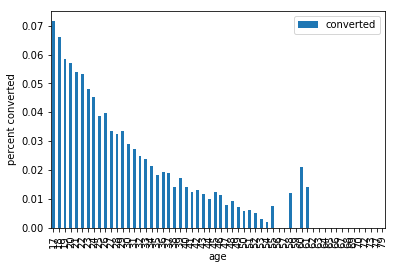

In [52]:
# What ages are better?
conversions_ages = conv_noOutliers.groupby(['age']).agg({'converted':'sum'})
all_ages = conv_noOutliers.groupby(['age']).size()

ages_pcts = conversions_ages.divide(all_ages, axis='rows')

print(ages_pcts)

ages_pcts.plot.bar().set_ylabel("percent converted")
plt.show()

In [66]:
# Given these initial findings, let's make a decision tree to indicate which are most useful in predicting conversions
clf = tree.DecisionTreeClassifier(max_depth=5,class_weight='balanced') # let's just see the first few splits, to see what's important here
#x_vars = conv_noOutliers[['country','age','new_user','source','total_pages_visited']]
x_vars = pd.get_dummies(conv_noOutliers['country'])
x_vars = pd.concat([x_vars, pd.get_dummies(conv_noOutliers['source'])], axis=1)
#x_vars['standard_age'] = (conv_noOutliers['age'] - np.mean(conv_noOutliers['age'])) / np.std(conv_noOutliers['age'])
#x_vars['standard_pages'] = (conv_noOutliers['total_pages_visited'] - np.mean(conv_noOutliers['total_pages_visited'])) / np.std(conv_noOutliers['total_pages_visited'])
x_vars['new_user'] = conv_noOutliers['new_user']

#print(x_vars)
#enc = OneHotEncoder()
#enc.fit(x_vars)
#print(enc.n_values_)
y_vars = conv_noOutliers['converted']
clf = clf.fit(x_vars, y_vars)


In [67]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 


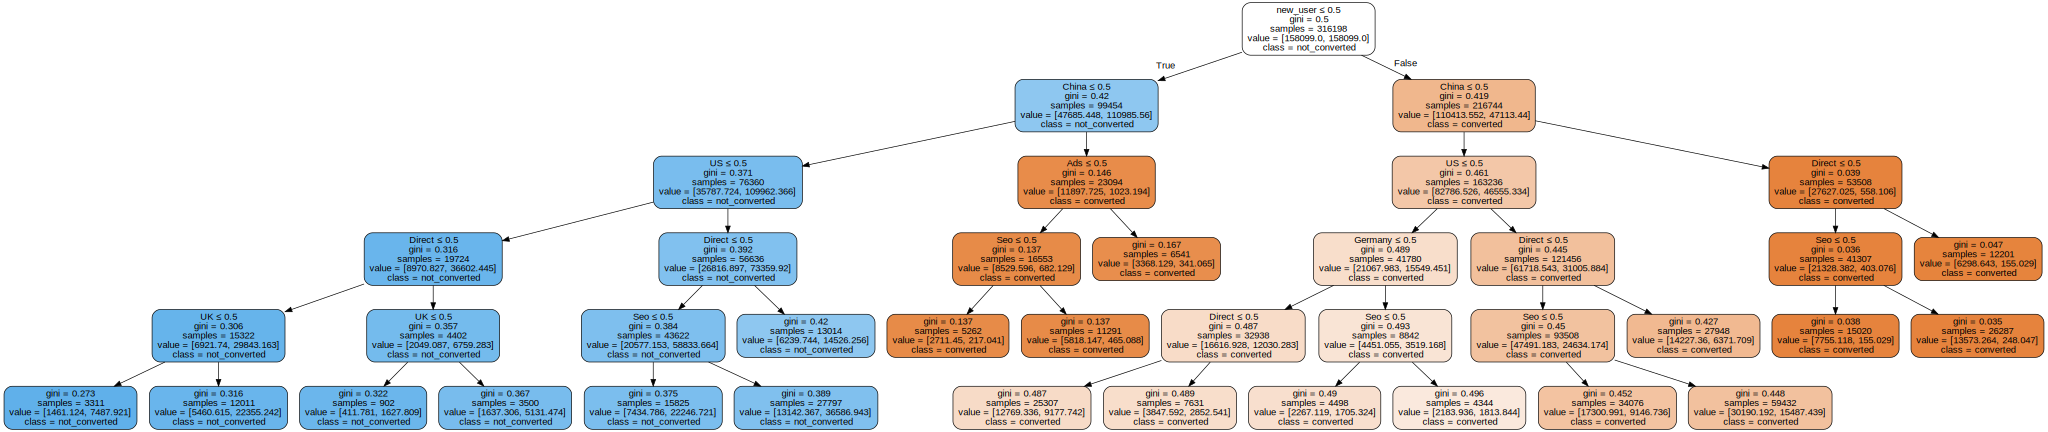

In [68]:
conv_gv = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x_vars.columns,  
                         class_names=['converted','not_converted'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(conv_gv)  
graph 

In [41]:
# Hmm, so the most predictive thing about conversion is whether the user is from China. If they are: who's converting?
china_conversions = conv_noOutliers[(conv_noOutliers['country'] == 'China') & (conv_noOutliers['converted'] == 1)]
print('Percent of Chinese converters who were new users = {}.'.format(np.mean(china_conversions['new_user'])))
print('Average age of a Chinese converter = {}.'.format(np.mean(china_conversions['age'])))
print('Average pages visited by a Chinese converter = {}.'.format(np.mean(china_conversions['total_pages_visited'])))

Percent of Chinese converters who were new users = 0.35294117647058826.
Average age of a Chinese converter = 25.80392156862745.
Average pages visited by a Chinese converter = 14.352941176470589.


In [49]:
# And if we split on China, source seems to be informative also...
china_ads = china_conversions[china_conversions['source'] == 'Ads']
print('Percent of Chinese converters who were swayed by ads = {}.'.format(len(china_ads) / len(china_conversions)))
china_seo = china_conversions[china_conversions['source'] == 'Seo']
print('Percent of Chinese converters who were seduced by SEO = {}.'.format(len(china_seo) / len(china_conversions)))
china_direct = china_conversions[china_conversions['source'] == 'Direct']
print('Percent of Chinese converters who came directly = {}.'.format(len(china_direct) / len(china_conversions)))




Percent of Chinese converters who were swayed by ads = 0.3137254901960784.
Percent of Chinese converters who were seduced by SEO = 0.45098039215686275.
Percent of Chinese converters who came directly = 0.23529411764705882.


In [44]:
# Let's contrast these numbers with other countries
us_conversions = conv_noOutliers[(conv_noOutliers['country'] == 'US') & (conv_noOutliers['converted'] == 1)]
print('Percent of US converters who were new users = {}.'.format(np.mean(us_conversions['new_user'])))
print('Average age of a US converter = {}.'.format(np.mean(us_conversions['age'])))
print('Average pages visited by a US converter = {}.'.format(np.mean(us_conversions['total_pages_visited'])))
british_conversions = conv_noOutliers[(conv_noOutliers['country'] == 'UK') & (conv_noOutliers['converted'] == 1)]
print('Percent of Brit converters who were new users = {}.'.format(np.mean(british_conversions['new_user'])))
print('Average age of a Brit converter = {}.'.format(np.mean(british_conversions['age'])))
print('Average pages visited by a Brit converter = {}.'.format(np.mean(british_conversions['total_pages_visited'])))
german_conversions = conv_noOutliers[(conv_noOutliers['country'] == 'Germany') & (conv_noOutliers['converted'] == 1)]
print('Percent of German converters who were new users = {}.'.format(np.mean(german_conversions['new_user'])))
print('Average age of a German converter = {}.'.format(np.mean(german_conversions['age'])))
print('Average pages visited by a German converter = {}.'.format(np.mean(german_conversions['total_pages_visited'])))




Percent of US converters who were new users = 0.29708853238265004.
Average age of a US converter = 26.581550802139038.
Average pages visited by a US converter = 14.561497326203208.
Percent of Brit converters who were new users = 0.30443311102393095.
Average age of a Brit converter = 26.455865045115733.
Average pages visited by a Brit converter = 14.53628874068262.
Percent of German converters who were new users = 0.2785276073619632.
Average age of a German converter = 26.41472392638037.
Average pages visited by a German converter = 14.571779141104294.


In [52]:
us_ads = us_conversions[us_conversions['source'] == 'Ads']
print('Percent of US converters who were swayed by ads = {}.'.format(len(us_ads) / len(us_conversions)))
us_seo = us_conversions[us_conversions['source'] == 'Seo']
print('Percent of US converters who were seduced by SEO = {}.'.format(len(us_seo) / len(us_conversions)))
us_direct = us_conversions[us_conversions['source'] == 'Direct']
print('Percent of US converters who came directly = {}.'.format(len(us_direct) / len(us_conversions)))

brit_ads = british_conversions[british_conversions['source'] == 'Ads']
print('Percent of Brit converters who were swayed by ads = {}.'.format(len(brit_ads) / len(british_conversions)))
brit_seo = british_conversions[british_conversions['source'] == 'Seo']
print('Percent of Brit converters who were seduced by SEO = {}.'.format(len(brit_seo) / len(british_conversions)))
brit_direct = british_conversions[british_conversions['source'] == 'Direct']
print('Percent of Brit converters who came directly = {}.'.format(len(brit_direct) / len(british_conversions)))

german_ads = german_conversions[german_conversions['source'] == 'Ads']
print('Percent of German converters who were swayed by ads = {}.'.format(len(german_ads) / len(german_conversions)))
german_seo = german_conversions[german_conversions['source'] == 'Seo']
print('Percent of German converters who were seduced by SEO = {}.'.format(len(german_seo) / len(german_conversions)))
german_direct = german_conversions[german_conversions['source'] == 'Direct']
print('Percent of German converters who came directly = {}.'.format(len(german_direct) / len(german_conversions)))




Percent of US converters who were swayed by ads = 0.30080213903743314.
Percent of US converters who were seduced by SEO = 0.4989601901366607.
Percent of US converters who came directly = 0.20023767082590613.
Percent of Brit converters who were swayed by ads = 0.29462534327187134.
Percent of Brit converters who were seduced by SEO = 0.5033346410357002.
Percent of Brit converters who came directly = 0.2020400156924284.
Percent of German converters who were swayed by ads = 0.3079754601226994.
Percent of German converters who were seduced by SEO = 0.5042944785276073.
Percent of German converters who came directly = 0.18773006134969325.


In [61]:
# Let's do the same thing for non-converters, just to understand the space

us_nonconversions = conv_noOutliers[(conv_noOutliers['country'] == 'US') & (conv_noOutliers['converted'] == 0)]
print('Percent of US non-converters who were new users = {}.'.format(np.mean(us_nonconversions['new_user'])))
print('Average age of a US non-converter = {}.'.format(np.mean(us_nonconversions['age'])))
print('Average pages visited by a US non-converter = {}.'.format(np.mean(us_nonconversions['total_pages_visited'])))

non_us_ads = us_nonconversions[us_nonconversions['source'] == 'Ads']
print('Percent of US non-converters who arrived by ads = {}.'.format(len(non_us_ads) / len(us_nonconversions)))
non_us_seo = us_nonconversions[us_nonconversions['source'] == 'Seo']
print('Percent of US non-converters who arrived by SEO = {}.'.format(len(non_us_ads) / len(us_nonconversions)))
non_us_direct = us_nonconversions[us_nonconversions['source'] == 'Direct']
print('Percent of US non-converters who arrived directly = {}.'.format(len(non_us_direct) / len(us_nonconversions)))

print("") # skip a line

brit_nonconversions = conv_noOutliers[(conv_noOutliers['country'] == 'UK') & (conv_noOutliers['converted'] == 0)]
print('Percent of Brit non-converters who were new users = {}.'.format(np.mean(brit_nonconversions['new_user'])))
print('Average age of a Brit non-converter = {}.'.format(np.mean(brit_nonconversions['age'])))
print('Average pages visited by a Brit non-converter = {}.'.format(np.mean(brit_nonconversions['total_pages_visited'])))

non_brit_ads = brit_nonconversions[brit_nonconversions['source'] == 'Ads']
print('Percent of Brit non-converters who arrived by ads = {}.'.format(len(non_brit_ads) / len(brit_nonconversions)))
non_brit_seo = brit_nonconversions[brit_nonconversions['source'] == 'Seo']
print('Percent of Brit non-converters who arrived by SEO = {}.'.format(len(non_brit_seo) / len(brit_nonconversions)))
non_brit_direct = brit_nonconversions[brit_nonconversions['source'] == 'Direct']
print('Percent of Brit non-converters who arrived directly = {}.'.format(len(non_brit_direct) / len(brit_nonconversions)))

print("") # skip a line

german_nonconversions = conv_noOutliers[(conv_noOutliers['country'] == 'Germany') & (conv_noOutliers['converted'] == 0)]
print('Percent of German non-converters who were new users = {}.'.format(np.mean(german_nonconversions['new_user'])))
print('Average age of a German non-converter = {}.'.format(np.mean(german_nonconversions['age'])))
print('Average pages visited by a German non-converter = {}.'.format(np.mean(german_nonconversions['total_pages_visited'])))

non_german_ads = german_nonconversions[german_nonconversions['source'] == 'Ads']
print('Percent of German non-converters who arrived by ads = {}.'.format(len(non_german_ads) / len(german_nonconversions)))
non_german_seo = german_nonconversions[german_nonconversions['source'] == 'Seo']
print('Percent of German non-converters who arrived by SEO = {}.'.format(len(non_german_seo) / len(german_nonconversions)))
non_german_direct = german_nonconversions[german_nonconversions['source'] == 'Direct']
print('Percent of German non-converters who arrived directly = {}.'.format(len(non_german_direct) / len(german_nonconversions)))

print("") # skip a line

china_nonconversions = conv_noOutliers[(conv_noOutliers['country'] == 'China') & (conv_noOutliers['converted'] == 0)]
print('Percent of Chinese non-converters who were new users = {}.'.format(np.mean(china_nonconversions['new_user'])))
print('Average age of a Chinese non-converter = {}.'.format(np.mean(china_nonconversions['age'])))
print('Average pages visited by a Chinese non-converter = {}.'.format(np.mean(china_nonconversions['total_pages_visited'])))

non_chinese_ads = china_nonconversions[china_nonconversions['source'] == 'Ads']
print('Percent of Chinese non-converters who arrived by ads = {}.'.format(len(non_chinese_ads) / len(china_nonconversions)))
non_chinese_seo = china_nonconversions[china_nonconversions['source'] == 'Seo']
print('Percent of Chinese non-converters who arrived by SEO = {}.'.format(len(non_chinese_seo) / len(china_nonconversions)))
non_chinese_direct = china_nonconversions[china_nonconversions['source'] == 'Direct']
print('Percent of Chinese non-converters who arrived directly = {}.'.format(len(non_chinese_direct) / len(china_nonconversions)))




Percent of US non-converters who were new users = 0.6971055088702147.
Average age of a US non-converter = 30.723033380018673.
Average pages visited by a US non-converter = 4.551785714285714.
Percent of US non-converters who arrived by ads = 0.27938842203548087.
Percent of US non-converters who arrived by SEO = 0.27938842203548087.
Percent of US non-converters who arrived directly = 0.23117413632119516.

Percent of Brit non-converters who were new users = 0.7006971677559913.
Average age of a Brit non-converter = 30.671677559912855.
Average pages visited by a Brit non-converter = 4.557037037037037.
Percent of Brit non-converters who arrived by ads = 0.2781263616557734.
Percent of Brit non-converters who arrived by SEO = 0.49058823529411766.
Percent of Brit non-converters who arrived directly = 0.23128540305010895.

Percent of German non-converters who were new users = 0.7038398692810458.
Average age of a German non-converter = 30.711111111111112.
Average pages visited by a German non-con

# Conclusions
**There are several factors affecting conversion in this dataset, from our initial data exploration:**<br>
1. Country - Germany and the UK convert the most; the US converts almost as well. China converts extremely rarely.
2. As far as those who actually convert are concerned, they're more likely to come in by SEO than Ads, and more likely to come in by Ads than directly.
3. Users who have visited before are far more likely to convert.
4. As far as total pages visited, more is better. Users who visited more than 20 pages were almost 100% converters.
5. As far as age is concerned, younger is better (barring outliers). Younger users were more likely to convert.

# Recommendations
**We'd like to increase our conversion rate. The decision tree can help us do that.**
1. By far the most visitors who come to our site are from the US. We also have a decent conversion rate in the US, relative to other countries (~4%). However, SEO brings in a far larger percentage of visitors from other countries than it does for the US. This may mean that US SEO isn't that great, or it may mean that ads and brand recognition (leading to direct access) in the US are far better. Depending on which it is, we may want to target US SEO.
2. Our second-largest block of visitors come from China, and we have a terrible conversion rate with them. Thus, we have a real potential in this market. Chinese converters are more likely to be new users than those in the US or Europe. Thus, we may want to target impulse buyers from China.
3. British visitors are our third largest group; these people have a relatively high conversion rate (5%). If we group these in with German visitors (less than 10% of those from the US), we can say that Europeans come mostly through SEO, and convert at a higher rate than US visitors. Thus, we should consider targeting Ads toward our European customers.